## The Sparks Foundation 
    
## Domain :Data Science and Business Analysis
## TASK 4: Exploratory Data Analysis - Terrorism

### (Level - Intermediate)

##  DONE BY :NIKETHA SABESAN

### AIM :  To Determine Hot Zone of Terrorism using ‘Exploratory Data Analysis’ on the given dataset - Global Terrorism

Dataset: https://bit.ly/2TK5Xn5

### Exploratory Data Analysis is used to analyze datasets to summarize data through visual methods . It is used to explore the data and formulate new hypothesis beyond the formal Modelling

## Step 1: Importing Libraries

In [87]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Step 2: Read The Datasets

In [114]:
df = pd.read_csv(r'C:\Users\Vineeth_Infor\Desktop\Data Science\globalterrorismdb_0718dist.csv')

In [116]:
df.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [89]:
df.columns

Index(['Year', 'Month', 'Day', 'Country', 'state', 'Region', 'city',
       'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded', 'Target',
       'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive'],
      dtype='object')

## Step 3: Preprocessing The Data

In [90]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [91]:
df=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [92]:
df.head()

Year  Month  Day        Country       state         Region     city  \
5   1970      1    1  United States    Illinois  North America    Cairo   
7   1970      1    2  United States  California  North America  Oakland   
8   1970      1    2  United States   Wisconsin  North America  Madison   
9   1970      1    3  United States   Wisconsin  North America  Madison   
11  1970      1    6  United States    Colorado  North America   Denver   

     latitude   longitude                      AttackType  Killed  Wounded  \
5   37.005105  -89.176269                   Armed Assault     0.0      0.0   
7   37.791927 -122.225906               Bombing/Explosion     0.0      0.0   
8   43.076592  -89.412488  Facility/Infrastructure Attack     0.0      0.0   
9   43.072950  -89.386694  Facility/Infrastructure Attack     0.0      0.0   
11  39.758968 -104.876305  Facility/Infrastructure Attack     0.0      0.0   

                                               Target  \
5                           Cairo Police Headquarters   
7                                     Edes Substation   
8   R.O.T.C. offices at University of Wisconsin, M...   
9   Selective Service Headquarters in Madison Wisc...   
11           Army Recruiting Station, Denver Colorado   

                                              Summary                Group  \
5   1/1/1970: Unknown African American assailants ...   Black Nationalists   
7   1/2/1970: Unknown perpetrators detonated explo...              Unknown   
8   1/2/1970: Karl Armstrong, a member of the New ...      New Year's Gang   
9   1/3/1970: Karl Armstrong, a member of the New ...      New Year's Gang   
11  1/6/1970: Unknown perpetrators threw a Molotov...  Left-Wing Militants   

             Target_type Weapon_type  \
5                 Police    Firearms   
7              Utilities  Explosives   
8               Military  Incendiary   
9   Government (General)  Incendiary   
11              Military  Incendiary   

                                            Motive  
5   To protest the Cairo Illinois Police Deparment  
7                                              NaN  
8      To protest the War in Vietnam and the draft  
9      To protest the War in Vietnam and the draft  
11               Protest the draft and Vietnam War

In [93]:
df.shape

(115562, 18)

## Step 4 : Data Wragling Checking the null values in data

In [94]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
state             12
Region             0
city             434
latitude         949
longitude        949
AttackType         0
Killed          4296
Wounded         8276
Target           200
Summary            0
Group              0
Target_type        0
Weapon_type        0
Motive         65002
dtype: int64

### Step 4.1 : Checking the Null Values in data

In [95]:
df.dropna(subset=["Summary"],axis=0,inplace=True)

<AxesSubplot:>

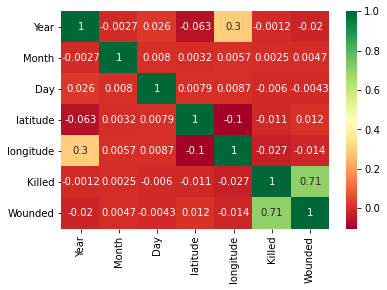

In [96]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

## Step 5: Figuring All the Required Data set
### Sorting The Most Attacked Country

In [97]:
coun_attack = df.Country.value_counts()[:10]
coun_attack

Iraq           24494
Pakistan       12627
Afghanistan    12617
India           9097
Philippines     4970
Somalia         3978
Nigeria         3847
Thailand        3632
Yemen           3264
Colombia        2313
Name: Country, dtype: int64

### Plotting The Most Attacked Country

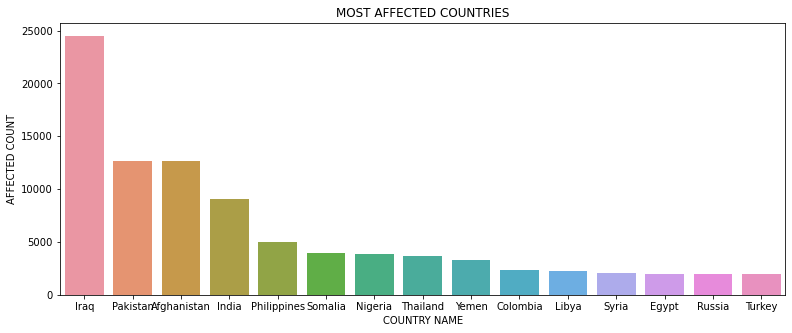

In [98]:
plt.subplots(figsize=(13,5))
sns.barplot(df['Country'].value_counts()[:15].index,df['Country'].value_counts()[:15].values,)
plt.title('MOST AFFECTED COUNTRIES')
plt.xlabel('COUNTRY NAME')
plt.ylabel('AFFECTED COUNT')
plt.show()

### Sorting and Plotting The Most Attacked City

In [99]:
city_attack = df.city.value_counts()[:10]
city_attack

Baghdad      7545
Unknown      5118
Mosul        2262
Karachi      1552
Mogadishu    1486
Kirkuk        921
Benghazi      837
Quetta        787
Baqubah       744
Peshawar      726
Name: city, dtype: int64

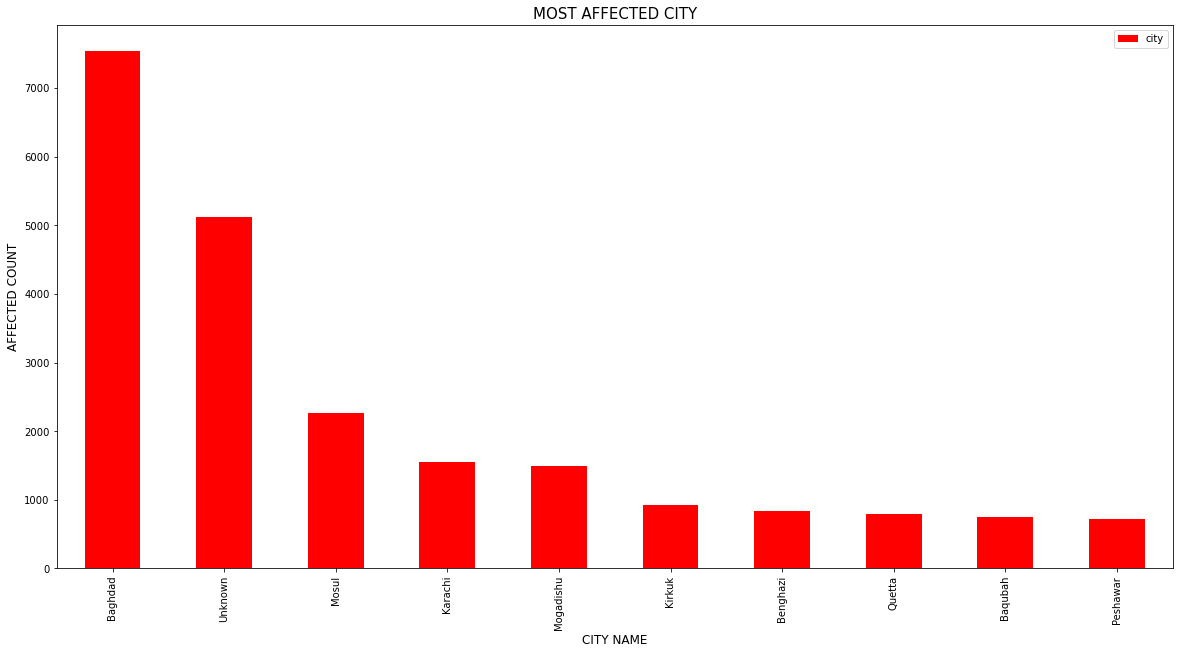

In [100]:
# Plotting The Most Attacked City

df['city'].value_counts().to_frame().sort_values('city',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='red')
plt.xlabel("CITY NAME",fontsize=12)
plt.ylabel("AFFECTED COUNT",fontsize=12)
plt.title("MOST AFFECTED CITY",fontsize=15)
plt.show()

### Sorting and Plotting The Most Attacked State

In [101]:
state_attack = df.state.value_counts()[:10]
state_attack

Baghdad                                7601
Balochistan                            3666
Saladin                                3405
Al Anbar                               3296
Nineveh                                3237
Khyber Pakhtunkhwa                     3082
Diyala                                 3037
Federally Administered Tribal Areas    2378
Sindh                                  1988
Jammu and Kashmir                      1812
Name: state, dtype: int64

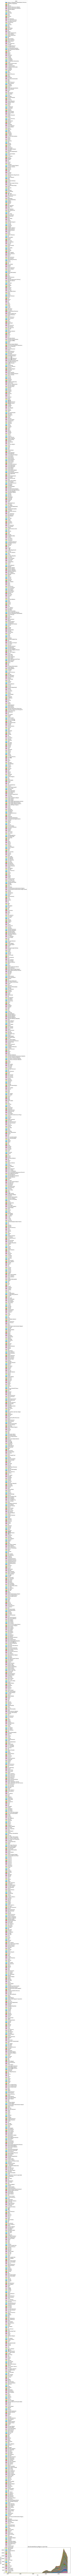

In [102]:
### Plotting The Most Attacked State


pd.crosstab(df.Year, df.state).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

### Figuring out the Number of Terrorrism occured in a year

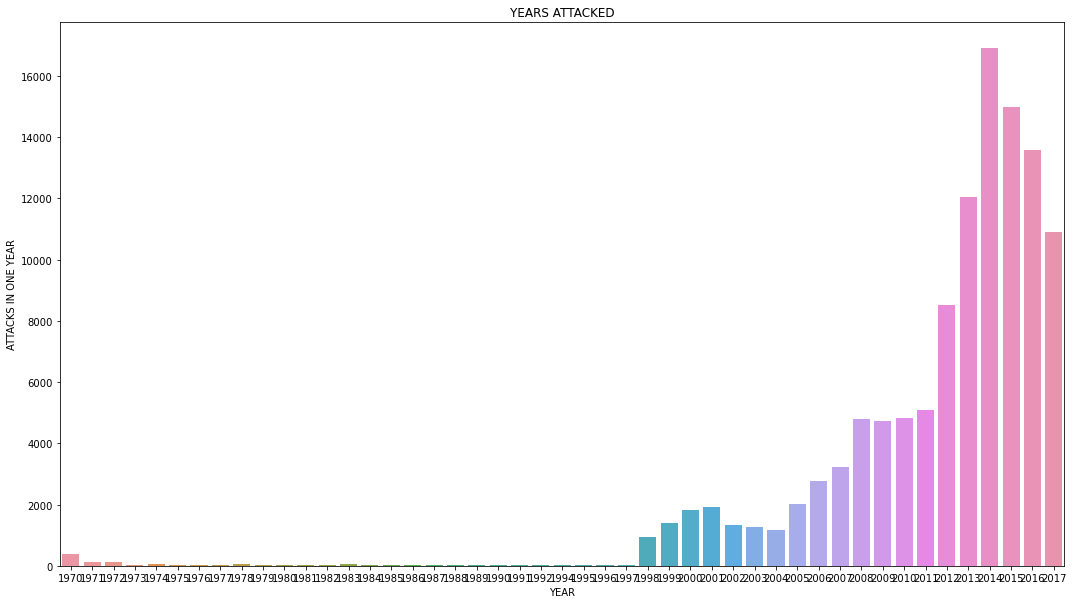

In [103]:
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years)
plt.xlabel('YEAR')
plt.ylabel('ATTACKS IN ONE YEAR')
plt.title('YEARS ATTACKED')
plt.show()

### Sorting and Plotting The  Most Affected Cases In a Year

In [104]:
yr_attack = df.Target_type.value_counts()[:10]
yr_attack

Private Citizens & Property       31450
Military                          18899
Police                            16963
Government (General)              12697
Business                           9600
Unknown                            5083
Transportation                     3275
Religious Figures/Institutions     3216
Educational Institution            3105
Utilities                          2394
Name: Target_type, dtype: int64

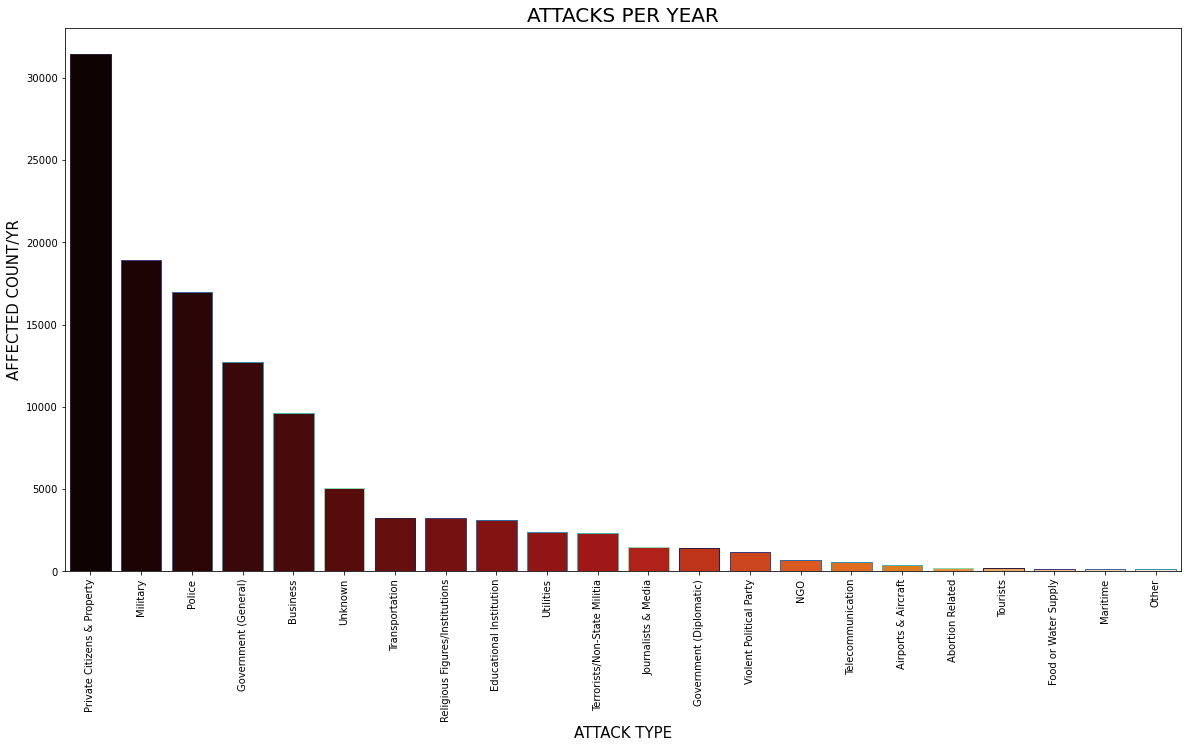

In [105]:
### Plotting The  Most Affected Cases In a Year


plt.subplots(figsize=(20,10))
sns.countplot(df["Target_type"],order=df['Target_type'].value_counts().index,palette="gist_heat",edgecolor=sns.color_palette("mako"));
plt.xticks(rotation=90)
plt.xlabel("ATTACK TYPE",fontsize=15)
plt.ylabel("AFFECTED COUNT/YR",fontsize=15)
plt.title("ATTACKS PER YEAR",fontsize=20)
plt.show()

In [106]:
#4.2

df['Year'].value_counts(dropna = False).sort_index()

1970      386
1971      139
1972      116
1973       28
1974       49
1975       32
1976       37
1977       20
1978       48
1979       14
1980       24
1981       25
1982       30
1983       25
1984       50
1985       27
1986       40
1987       27
1988       30
1989       29
1990       33
1991       31
1992       28
1994       34
1995       27
1996       23
1997       26
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

### Sorting and Plotting the Major Group Attacks

In [107]:
grp_attack = df.Group.value_counts()[:10]
grp_attack

Unknown                                           59633
Taliban                                            7474
Islamic State of Iraq and the Levant (ISIL)        5613
Al-Shabaab                                         3288
Boko Haram                                         2418
Communist Party of India - Maoist (CPI-Maoist)     1878
New People's Army (NPA)                            1800
Maoists                                            1619
Tehrik-i-Taliban Pakistan (TTP)                    1351
Revolutionary Armed Forces of Colombia (FARC)      1331
Name: Group, dtype: int64

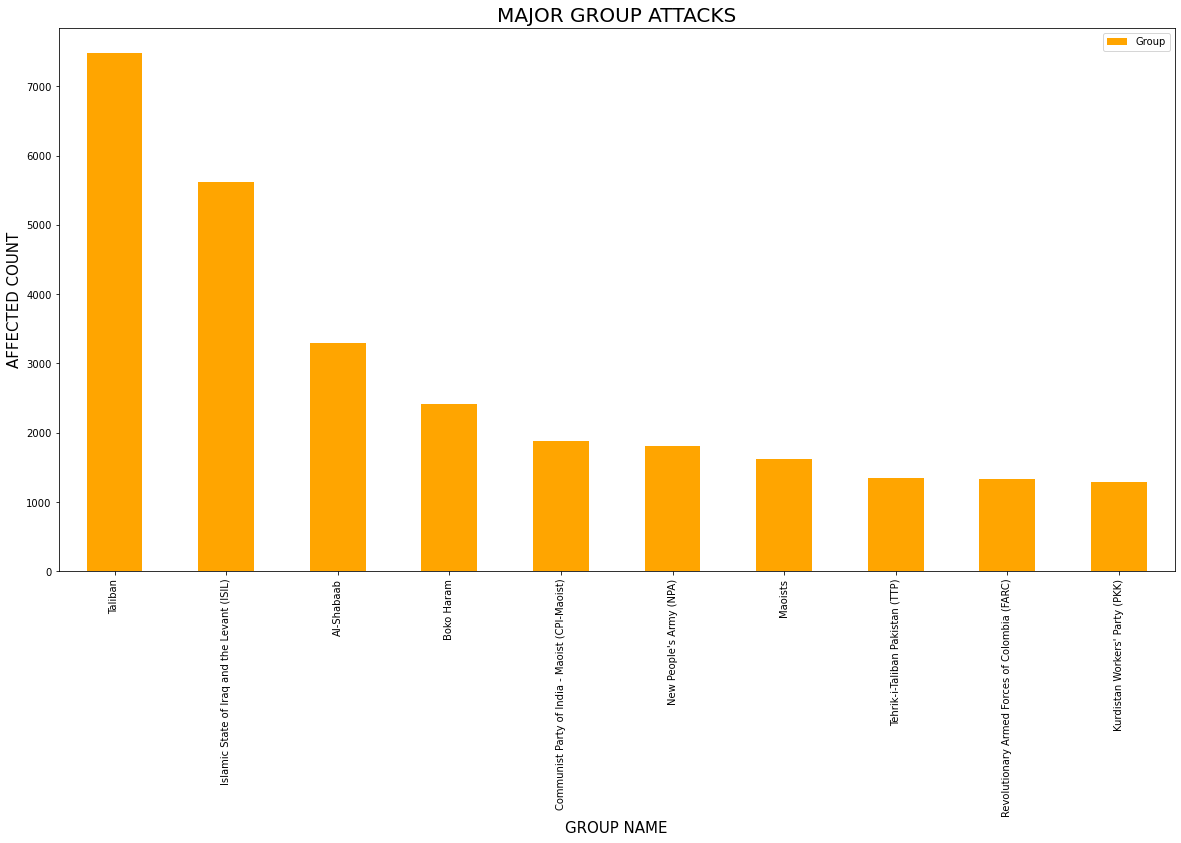

In [108]:
### Plotting the Major Group Attacks

df['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='Orange',figsize=(20,10))
plt.title("MAJOR GROUP ATTACKS",fontsize=20)
plt.xlabel("GROUP NAME",fontsize=15)
plt.ylabel("AFFECTED COUNT",fontsize=15)
plt.show()

###  Determining The Highest Attack Type

In [109]:
att = df.loc[:,'AttackType']
typeKillData = pd.concat([att, killData], axis=1)
typeKillData.head()

AttackType  Killed
0        NaN     1.0
1        NaN     0.0
2        NaN     1.0
3        NaN     NaN
4        NaN     NaN

### Determining The Death Rate

In [110]:
death = df.loc[:,'Killed']
print('Total death rate is:', int(sum(death.dropna())))

Total death rate is: 280824


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115562 entries, 5 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         115562 non-null  int64  
 1   Month        115562 non-null  int64  
 2   Day          115562 non-null  int64  
 3   Country      115562 non-null  object 
 4   state        115550 non-null  object 
 5   Region       115562 non-null  object 
 6   city         115128 non-null  object 
 7   latitude     114613 non-null  float64
 8   longitude    114613 non-null  float64
 9   AttackType   115562 non-null  object 
 10  Killed       111266 non-null  float64
 11  Wounded      107286 non-null  float64
 12  Target       115362 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        115562 non-null  object 
 15  Target_type  115562 non-null  object 
 16  Weapon_type  115562 non-null  object 
 17  Motive       50560 non-null   object 
dtypes: float64(4), int64(3),

## Step 5:Establish a Relation Between Killed and Wounded


<AxesSubplot:xlabel='Wounded', ylabel='Killed'>

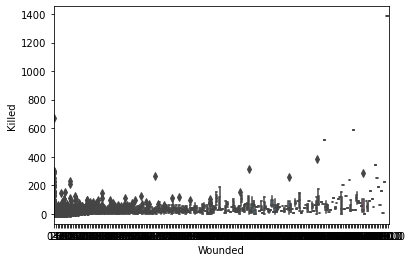

In [112]:
sns.boxplot(x="Wounded", y="Killed", data=df)

## Step 6 : Conclusion 


In [113]:
print("Country with highest attacks:",df['Country'].value_counts().idxmax())
print("City with highest attacks:",df['city'].value_counts().index[1]) 
print("State with highest attacks:",df['Region'].value_counts().idxmax())
print("Year with the most attacks:",df['Year'].value_counts().idxmax())
print("Most Frequent terrorist gropu:",df['Group'].value_counts().index[1])
print("Frequently used Attack types",df['AttackType'].value_counts().idxmax())

Country with highest attacks: Iraq
City with highest attacks: Unknown
State with highest attacks: Middle East & North Africa
Year with the most attacks: 2014
Most Frequent terrorist gropu: Taliban
Frequently used Attack types Bombing/Explosion


### Observation:
### As a Security Analyst i was asked to find out the Hot Zone Of Global terrorism  .
### With the help of Explonatory Data Analysis visuvalizations i was able to conclude with the above results .

# Insights derived by EDA:

### Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences. The Middle East and North Africa are seen to be the places of serious terrorist attacks.

### Armed assault and bombing/explosion are seen to be the cause of 77% of the deaths in these attacks. This rate is why these attacks are used so many times in terrorist actions. This is how dangerous weapons and explosives are to the world.

### 84% of the terrorist attacks in 1970 were carried out on the American continent. In 1970, the Middle East and North Africa, currently the center of wars and terrorist attacks, faced only one terrorist attack